<a href="https://colab.research.google.com/github/ngcheeyuan/Tensorflow-Certification-Practice/blob/main/horses_or_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers

In [3]:
ds , ds_info = tfds.load(name = 'horses_or_humans',
                         with_info = True,
                         as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteKT5WQX/horses_or_humans-train.tfrecord


  0%|          | 0/1027 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteKT5WQX/horses_or_humans-test.tfrecord


  0%|          | 0/256 [00:00<?, ? examples/s]

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [4]:
ds_info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

In [5]:
len(ds['train'])

1027

In [26]:
train_data = ds['train'].batch(1)
test_data = ds['test'].batch(1)

In [27]:
train_data , test_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [28]:
class_dict ={1:'human',0:'horse'}

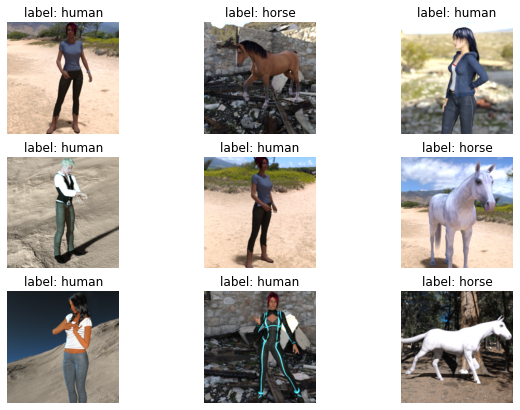

In [29]:
import random 
random_index = random.randint(0,len(ds['train'])-9) 
sample = ds['train'].skip(random_index).take(9)

plt.figure(figsize = (10,7))
for index,(image,label) in enumerate(sample,1):
  plt.subplot(3,3,index)
  plt.imshow(image)
  plt.title(f'label: {class_dict[label.numpy()]}')
  plt.axis(False)

In [58]:
FILTERS = 10
KERNEL_SIZE = (3,3)

model = tf.keras.Sequential([
                             layers.Rescaling(scale = 1/255.),
                             layers.Conv2D(
                                           filters =  FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           padding = 'same',
                                           activation = 'relu'
                                           ),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           padding = 'same',
                                           activation = 'relu'
                                           ),
                             layers.MaxPool2D(),
                             layers.Conv2D(
                                           filters =  FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           padding = 'same',
                                           activation = 'relu'
                                           ),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           padding = 'same',
                                           activation = 'relu'
                                           ),
                             layers.MaxPool2D(),  
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           padding = 'same',
                                           activation = 'relu'
                                           ),
                             layers.MaxPool2D(),                                                         
                             layers.Flatten(),
                             layers.Dense(1,activation = 'sigmoid')
])

In [59]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [60]:
FILEPATH = 'model_checkpoint'
history_0 = model.fit(train_data,
                      epochs = 5,
                      validation_data = test_data,
                      callbacks = [tf.keras.callbacks.ModelCheckpoint(monitor = 'val_accuracy',
                                                                      save_best_only = True,
                                                                      filepath = FILEPATH)]
                      )

Epoch 1/5
1027/1027 [==============================] - ETA: 0s - loss: 0.4177 - accuracy: 0.8199INFO:tensorflow:Assets written to: model_checkpoint/assets


INFO:tensorflow:Assets written to: model_checkpoint/assets


1027/1027 [==============================] - 18s 17ms/step - loss: 0.4177 - accuracy: 0.8199 - val_loss: 1.1195 - val_accuracy: 0.8320
Epoch 2/5
1024/1027 [============================>.] - ETA: 0s - loss: 0.1599 - accuracy: 0.9355INFO:tensorflow:Assets written to: model_checkpoint/assets


INFO:tensorflow:Assets written to: model_checkpoint/assets


1027/1027 [==============================] - 17s 17ms/step - loss: 0.1594 - accuracy: 0.9357 - val_loss: 0.7505 - val_accuracy: 0.8828
Epoch 3/5
1027/1027 [==============================] - 16s 15ms/step - loss: 0.0771 - accuracy: 0.9718 - val_loss: 1.2413 - val_accuracy: 0.8711
Epoch 4/5
1027/1027 [==============================] - 16s 15ms/step - loss: 0.0796 - accuracy: 0.9776 - val_loss: 1.5732 - val_accuracy: 0.8672
Epoch 5/5
1027/1027 [==============================] - 17s 16ms/step - loss: 0.0197 - accuracy: 0.9951 - val_loss: 2.7746 - val_accuracy: 0.8828


In [61]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 300, 300, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 300, 300, 10)      280       
                                                                 
 conv2d_29 (Conv2D)          (None, 300, 300, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 150, 150, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 150, 150, 10)      910       
                                                                 
 conv2d_31 (Conv2D)          (None, 150, 150, 10)      910       
                                                     

In [71]:
def plot_curves(history):
  df = pd.DataFrame(history.history)
  df['epochs'] = range(0,len(df))

  plt.subplot(1,2,1)
  plt.plot(df['epochs'],df['accuracy'], label = 'accuracy')
  plt.plot(df['epochs'],df['val_accuracy'], label = 'val accuracy')

  plt.subplot(1,2,2)
  plt.plot(df['epochs'],df['loss'], label = 'loss')
  plt.plot(df['epochs'],df['val_loss'], label = 'val loss')
  
  plt.legend()

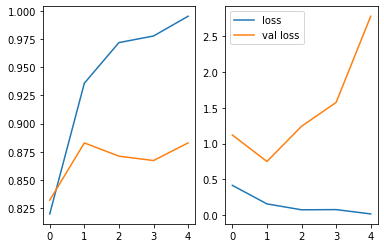

In [72]:
plot_curves(history_0)